# BMI 500 Python Quiz

### Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1) returns first n terms of Leibniz formula
def leibniz1(n):
    leibSum = 0
    for k in range(n):
        leibSum += (-1)**k/(2*k+1)
    return leibSum*4

### Problem 2

**Given an integer *n* return the sum of the first *n* terms of the series of Leibniz formula.**

In [3]:
# 2a) use a for-loop and if-statement with modulo operator to determine whether to add or subtract terms
def leibniz2a(n):
    leibSum = 0
    for k in range(n):
        if k%2 > 0:
            leibSum -= 1/(2*(k+1)-1)
        else:
            leibSum += 1/(2*(k+1)-1)
    return leibSum*4

# 2b) use a for-loop with quantity (-1)**n to determine whether to add or subtract terms
def leibniz2b(n):
    leibSum = 0
    for k in range(n):
        if (-1)**k < 0:
            leibSum -= 1/(2*(k+1)-1)
        else:
            leibSum += 1/(2*(k+1)-1)
    return leibSum*4

# 2c) construct a list and compute the sum of the terms in the list
def leibniz2c(n): 
    leibList = [(-1)**k/(2*k+1) for k in range(0,n)]
    return sum(leibList)*4

# 2d) construct a set and compute the sum of the terms in the set
def leibniz2d(n): 
    leibSet = set([(-1)**k/(2*k+1) for k in range(0,n)])
    return sum(leibSet)*4

# 2e) construct a dictionary and compute the sum of the terms in the dictionary
def leibniz2e(n): 
    leibDict = {k: term for k,term in 
                enumerate([(-1)**key/(2*key+1) for key in range(0,n)])}
    return sum(leibDict.values())*4

# 2f) construct a numpy array and compute the sum of the terms in the array
def leibniz2f(n): 
    leibArray = np.arange(0,n) 
    leibArray = (-1)**leibArray/(2*leibArray+1)
    return sum(leibArray)*4

# 2g) construct a numpy array and separately compute sum of positive and negative terms then add them together
#     use array indexing
def leibniz2g(n): 
    leibArray = np.arange(0,n) 
    leibArray = (-1)**leibArray/(2*leibArray+1)
    posSum = sum(leibArray[::2])
    negSum = sum(leibArray[1::2])
    return (posSum+negSum)*4

# 2j) combine first and second, third and fourth terms, etc to change series from an alternating to a
#     non-alternating series and compute sum of combined terms
def leibniz2j(n):
    leibArray = np.arange(0,n,2)
    if n%2 == 0:       # sum every 2 elements ONLY if there are an even number of terms
        leibArray = 1/(2*leibArray+1) - 1/(2*(leibArray+1)+1)
    else:              # exception if an odd number of terms to add last term on separately
        leibArray = leibArray[:-1]    
        leibArray = 1/(2*leibArray+1) - 1/(2*(leibArray+1)+1)
        leibArray = np.append(leibArray,1/(2*(n-1)+1))
    return sum(leibArray)*4

def prob2(x):       # print all implementations of leibniz formula for x terms
    print(leibniz1(x))
    print(leibniz2a(x))
    print(leibniz2b(x))
    print(leibniz2c(x))
    print(leibniz2d(x))
    print(leibniz2e(x))
    print(leibniz2f(x))
    print(leibniz2g(x))
    print(leibniz2j(x))
    
prob2(9)      # test for 9 terms

3.2523659347188767
3.2523659347188767
3.2523659347188767
3.2523659347188767
3.2523659347188767
3.2523659347188767
3.2523659347188767
3.252365934718876
3.2523659347188763


### Problem 3

**Which implementation is the most accurate, fastest, and/or clearest?**

The accuracy of each of the implementations is about equivalent, as seen from the comparison plot there is negligible difference in the error between each of the functions. The fastest implementation is 2a using the for loop with an if statement and modulo operator, although almost all of the functions have similar time performance, with the exception of 2f which is consistently slower, as shown in the second plot. The clearest and most intuitive implementation for me was 1. 

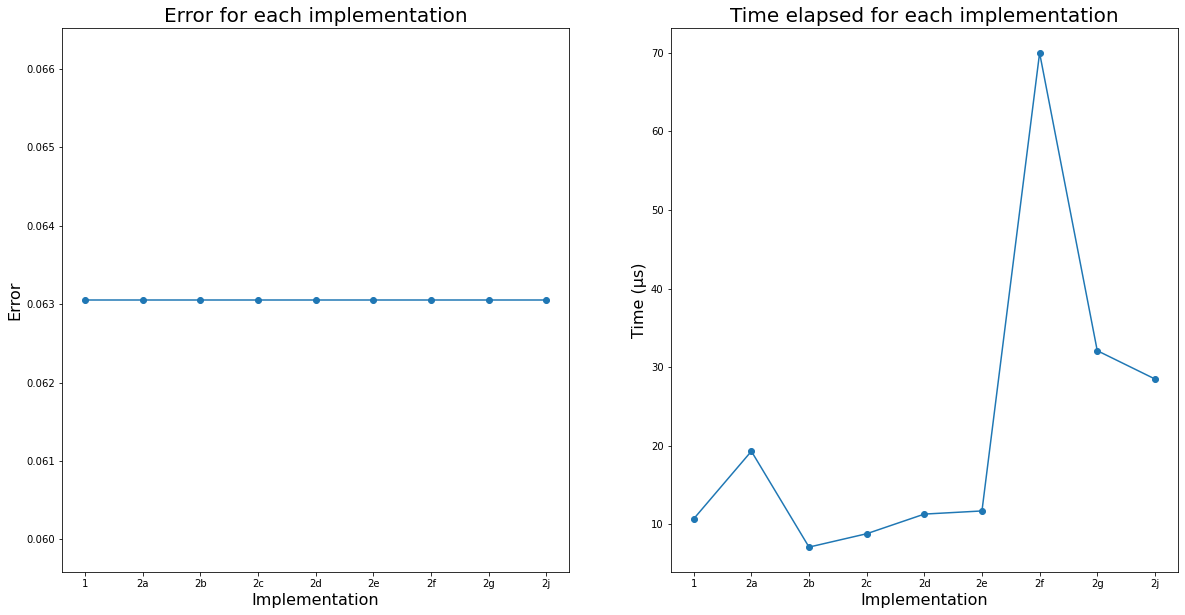

In [4]:
import timeit

# for each implementation save the time elapsed when running and error of the estimation
# x is the number of terms to calculate for
def prob3(x):
    err = np.empty(9)
    tottime = np.empty(9)

    x = 5

    start_time = timeit.default_timer()
    leibniz1(x)
    tottime[0] = timeit.default_timer()-start_time
    err[0] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2a(x)
    tottime[1] = timeit.default_timer()-start_time
    err[1] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2b(x)
    tottime[2] = timeit.default_timer()-start_time
    err[2] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2c(x)
    tottime[3] = timeit.default_timer()-start_time
    err[3] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2d(x)
    tottime[4] = timeit.default_timer()-start_time
    err[4] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2e(x)
    tottime[5] = timeit.default_timer()-start_time
    err[5] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2f(x)
    tottime[6] = timeit.default_timer()-start_time
    err[6] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2g(x)
    tottime[7] = timeit.default_timer()-start_time
    err[7] = abs(np.pi-leibniz1(x))/np.pi

    start_time = timeit.default_timer()
    leibniz2g(x)
    tottime[8] = timeit.default_timer()-start_time
    err[8] = abs(np.pi-leibniz1(x))/np.pi
    
    return err, tottime

err, tottime = prob3(100)   # save error and time elapsed for each implementation

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)         # plot error vs implementation
plt.plot(['1','2a','2b','2c','2d','2e','2f','2g','2j'],err,'-o')
plt.title('Error for each implementation',fontsize=20)
plt.xlabel('Implementation',fontsize=16)
plt.ylabel('Error',fontsize=16)
plt.subplot(1,2,2)        # plot time elapsed vs implementation
plt.plot(['1','2a','2b','2c','2d','2e','2f','2g','2j'],tottime*(10**6),'-o')
plt.title('Time elapsed for each implementation',fontsize=20)
plt.xlabel('Implementation',fontsize=16)
plt.ylabel('Time (μs)',fontsize=16)

plt.savefig('performance.png')

### Problem 4

[0.27323954 0.15117364 0.10347427 0.07841709 0.06305397 0.05269508
 0.04524642 0.03963621 0.03526023 0.03175238 0.02887808 0.02648016
 0.02444942 0.0227076  0.02119721 0.01987503 0.01870798 0.01767029
 0.01674159 0.01590558 0.01514905 0.01446118 0.01383304 0.01325717
 0.01272731 0.01223817 0.01178522 0.01136459 0.01097294 0.01060739
 0.01026539 0.00994476 0.00964354 0.00936003 0.00909271 0.00884024
 0.0086014  0.00837513 0.00816045 0.0079565  0.0077625  0.00757773
 0.00740156 0.00723338 0.00707268 0.00691896 0.00677178 0.00663074
 0.00649544 0.00636556 0.00624077 0.00612078 0.00600531 0.00589412
 0.00578697 0.00568365 0.00558395 0.00548769 0.0053947  0.0053048
 0.00521784 0.0051337  0.00505222 0.00497329 0.00489679 0.0048226
 0.00475063 0.00468077 0.00461294 0.00454705 0.00448302 0.00442076
 0.0043602  0.00430129 0.00424394 0.00418811 0.00413372 0.00408073
 0.00402908 0.00397872 0.0039296  0.00388168 0.00383492 0.00378927
 0.00374469 0.00370115 0.00365861 0.00361704 0.0035764  0.003536

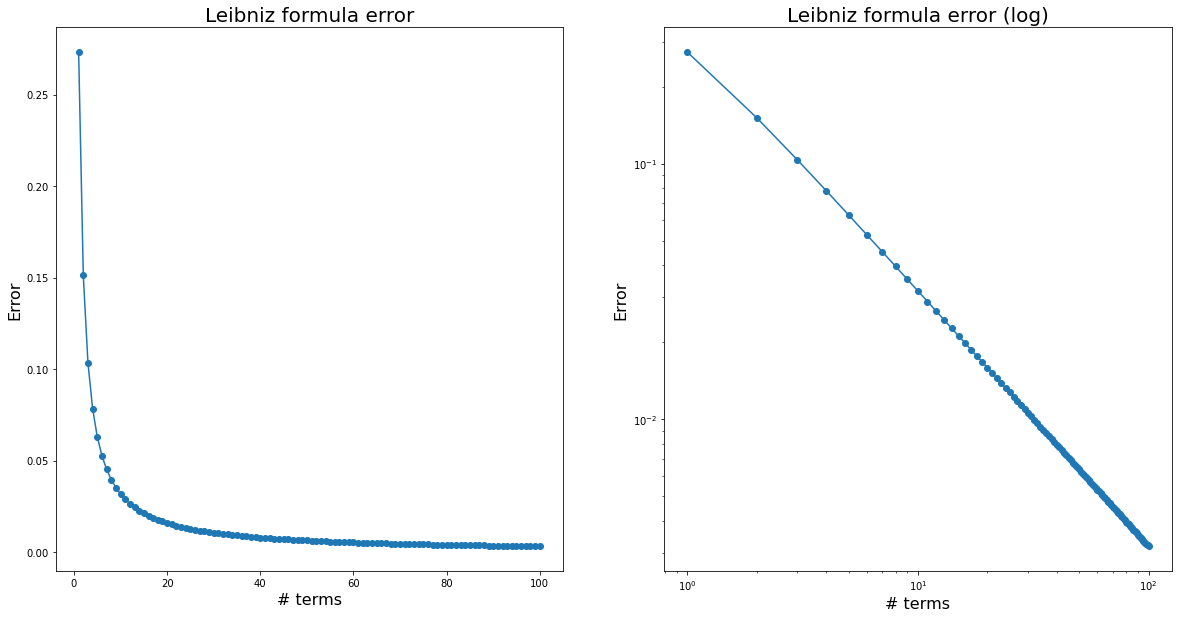

In [5]:
# Plot absolute error in sum as a function of the number of terms in the sum
# n is the total number of terms

def prob4(n):
    terms = np.arange(1,n+1)
    error = np.array([abs((np.pi-leibniz1(k))/np.pi) for k in range(1,n+1)])
    print(error)

    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)     # plot error vs n
    plt.title('Leibniz formula error',fontsize=20)
    plt.plot(terms,error,'-o')
    plt.xlabel('# terms',fontsize=16)
    plt.ylabel('Error',fontsize=16)
    plt.subplot(1,2,2)     # plot in log scale
    plt.title('Leibniz formula error (log)',fontsize=20)
    plt.plot(terms,error,'-o')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('# terms',fontsize=16)
    plt.ylabel('Error',fontsize=16)

    plt.savefig('leibniz_plot.png')
    
    return plt

prob4_plot = prob4(100)

### Problem 5

**Would you do anything differently for computing $\pi$ using the Leibniz formula if you were using MATLAB instead of Python?**

Most of the approaches implemented in Problems 1 and 2 could be replicated in MATLAB. If implementing in MATLAB the most intuitive way to me would be to iterate over a range of terms and add each element on in ech pass of the loop -- similarly to the approach in problem 1. 

MATLAB psuedocode:

    leibSum = 0;
    for n = 0:100
        leibSum = leibSum + (-1)^n/(2*n+1); 
    end
    leibSum*4